# Расширение фермерского хозяйства с помощью машинного обучения

## Описание проекта

В нашу IT - компанию поступила просьба фермера о помощи: расширить поголовье стада коров. Он хочет купить буренок у компании «ЭкоФерма», которая предоставила данные о своих коровах. Все данные представлены в виде трех таблиц.\
\
Первая - ferma_main. Ее предоставил нам фермер\
\
Параметры корма коровы\
ЭКЕ (Энергетическая кормовая единица) — измерение питательности корма коровы\
Сырой протеин — содержание сырого протеина в корме, в граммах\
СПО (Сахаро-протеиновое соотношение) — отношение сахара к протеину в корме коровы\
Где паслась корова\
Тип пастбища — ландшафт лугов, на которых паслась корова\
Особенности коровы\
id — номер коровы\
Порода — порода коровы\
Возраст — бинарный признак (менее_2_лет, более_2_лет)\
Имя Папы — порода папы коровы\
Характеристики молока\
Жирность — содержание жиров в молоке, в процентах\
Белок — содержание белков в молоке, в процентах\
Вкус молока — оценка вкуса по личным критериям фермера\
Удой — масса молока, которую корова даёт в год, в килограммах\
\
Вторая таблица ferma_dad. Тоже от фермера\
\
id\
Имя Папы\
\
Третья таблица cow_buy. От «ЭкоФерма» \
\
Порода\
Тип пастбища\
порода папы_быка\
Имя_папы\
Текущая_жирность,%\
Текущий_уровень_белок,%\
\
С помощью этих данных нужно создать две прогнозные модели для отбора бурёнок в поголовье\
Первая будет прогнозировать возможный удой у коровы (целевой признак Удой)\
Вторая — рассчитывать вероятность получить вкусное молоко от коровы (целевой признак Вкус молока)\
\
Для этого нужно будет загрузить, предобработать, исследовать, провести корреляционный анализ данных и только потом можно будет приступить к обучению моделей

## Задача проекта

Нужно помочь владельцу молочного хозяйства «Вольный луг» купить буренок. С помощью некоторых критериев надо обучить модели для отбора коров в поголовье. Первая будет прогнозировать возможный удой у коровы, а вторая - рассчитывать вероятность получить вкусное молоко от коровы.

## Загрузка данных

Необходимые библиотеки

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

# библиотеки для обучения моделей
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import (
    confusion_matrix,
    mean_absolute_error,
    mean_squared_error,
    r2_score,
    accuracy_score,
    recall_score,
    precision_score   
)

Загрузим данные и посмотрим на них

In [2]:
# разделим столбцы по ';' и сразу же заменим ',' на '.', чтобы числа считывались
ferma_main = pd.read_csv('/datasets/ferma_main.csv', sep = ';', decimal = ',')
ferma_dad = pd.read_csv('/datasets/ferma_dad.csv', sep = ';')
cow_buy = pd.read_csv('/datasets/cow_buy_old.csv', sep = ';', decimal = ',')
display(ferma_main.head())
print()
ferma_main.info()
print()
print()
display(ferma_dad.head())
print()
ferma_dad.info()
print()
print()
display(cow_buy.head())
print()
cow_buy.info()

,id,"Удой, кг",ЭКЕ (Энергетическая кормовая единица),"Сырой протеин, г",СПО (Сахаро-протеиновое соотношение),Порода,Тип пастбища,порода папы_быка,"Жирность,%","Белок,%",Вкус молока,Возраст
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,Равнинные,Соверин,3.54,3.079,вкусно,менее_2_лет
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет
3,4,5895,12.4,2012,0.885,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,Равнинные,Соверин,3.73,3.073,вкусно,менее_2_лет



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 12 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     634 non-null    int64  
 1   Удой, кг                               634 non-null    int64  
 2   ЭКЕ (Энергетическая кормовая единица)  634 non-null    float64
 3   Сырой протеин, г                       634 non-null    int64  
 4   СПО (Сахаро-протеиновое соотношение)   634 non-null    float64
 5   Порода                                 634 non-null    object 
 6   Тип пастбища                           634 non-null    object 
 7   порода папы_быка                       634 non-null    object 
 8   Жирность,%                             634 non-null    float64
 9   Белок,%                                634 non-null    float64
 10  Вкус молока                            634 non-null    object 
 11  Возра

,id,Имя Папы
0,1,Буйный
1,2,Соловчик
2,3,Барин
3,4,Буйный
4,5,Барин



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        629 non-null    int64 
 1   Имя Папы  629 non-null    object
dtypes: int64(1), object(1)
memory usage: 10.0+ KB




,Порода,Тип пастбища,порода папы_быка,Имя_папы,"Текущая_жирность,%","Текущий_уровень_белок,%"
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Порода                   20 non-null     object 
 1   Тип пастбища             20 non-null     object 
 2   порода папы_быка         20 non-null     object 
 3   Имя_папы                 20 non-null     object 
 4   Текущая_жирность,%       20 non-null     float64
 5   Текущий_уровень_белок,%  20 non-null     float64
dtypes: float64(2), object(4)
memory usage: 1.1+ KB


Переименуем,  столбцы таблиц и приведем их к нижнему регистру

In [3]:
ferma_main.columns = ['id', 'удой', 'энергетическая кормовая единица', 'сырой протеин', 'сахаро-протеиновое соотношение', 'порода', 'тип пастбища', 'порода папы быка', 'жирность', 'белок', 'вкус молока', 'возраст']
display(ferma_main.head())
ferma_dad.columns = ferma_dad.columns.str.lower()
display(ferma_dad.head())
cow_buy.columns = ['порода', 'тип пастбища', 'порода папы быка','имя папы', 'текущая жирность', 'текущий уровень белка']
display(cow_buy.head())

,id,удой,энергетическая кормовая единица,сырой протеин,сахаро-протеиновое соотношение,порода,тип пастбища,порода папы быка,жирность,белок,вкус молока,возраст
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,Равнинные,Соверин,3.54,3.079,вкусно,менее_2_лет
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет
3,4,5895,12.4,2012,0.885,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,Равнинные,Соверин,3.73,3.073,вкусно,менее_2_лет


,id,имя папы
0,1,Буйный
1,2,Соловчик
2,3,Барин
3,4,Буйный
4,5,Барин


,порода,тип пастбища,порода папы быка,имя папы,текущая жирность,текущий уровень белка
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074


На данном этапе мы загрузили, изучили и немного подкорректировали данные

##  Предобработка данных

Проверим данные на наличие пропусков и дубликатов

In [4]:
print(ferma_main.isna().sum())
print()
print(ferma_dad.isna().sum())
print()
print(cow_buy.isna().sum())

id                                 0
удой                               0
энергетическая кормовая единица    0
сырой протеин                      0
сахаро-протеиновое соотношение     0
порода                             0
тип пастбища                       0
порода папы быка                   0
жирность                           0
белок                              0
вкус молока                        0
возраст                            0
dtype: int64

id          0
имя папы    0
dtype: int64

порода                   0
тип пастбища             0
порода папы быка         0
имя папы                 0
текущая жирность         0
текущий уровень белка    0
dtype: int64


In [5]:
print(len(ferma_main[ferma_main.duplicated()]))
print(len(ferma_dad[ferma_dad.duplicated()]))
print(len(cow_buy[cow_buy.duplicated()]))

5
0
4


Пропусков в данных нет, а в первой и третьей таблице нашлось несколько дубликатов. Удалим их

In [6]:
ferma_main = ferma_main.drop_duplicates().reset_index(drop = True)
cow_buy = cow_buy.drop_duplicates().reset_index(drop = True)

Пропусков в данных не оказалось, но нашлось небольшое количество дубликатов, которые мы удалили. Типы данных не было необходимости менять

## Исследовательский анализ данных

Проведем статистический анализ всех признаков

,id,удой,энергетическая кормовая единица,сырой протеин,сахаро-протеиновое соотношение,жирность,белок
count,629.00000,629.000000,629.000000,629.000000,629.000000,629.000000,629.000000
mean,315.00000,6188.750397,14.543879,1923.364070,0.913116,3.603657,3.075671
std,181.72094,1644.795489,1.306408,182.956251,0.032203,0.168656,0.002549
min,1.00000,5204.000000,10.900000,1660.000000,0.840000,2.990000,3.069000
25%,158.00000,5751.000000,13.500000,1771.000000,0.890000,3.590000,3.074000
50%,315.00000,6133.000000,14.700000,1888.000000,0.930000,3.650000,3.076000
75%,472.00000,6501.000000,15.600000,2062.000000,0.940000,3.720000,3.077000
max,629.00000,45616.000000,16.800000,2349.000000,0.960000,3.750000,3.085000


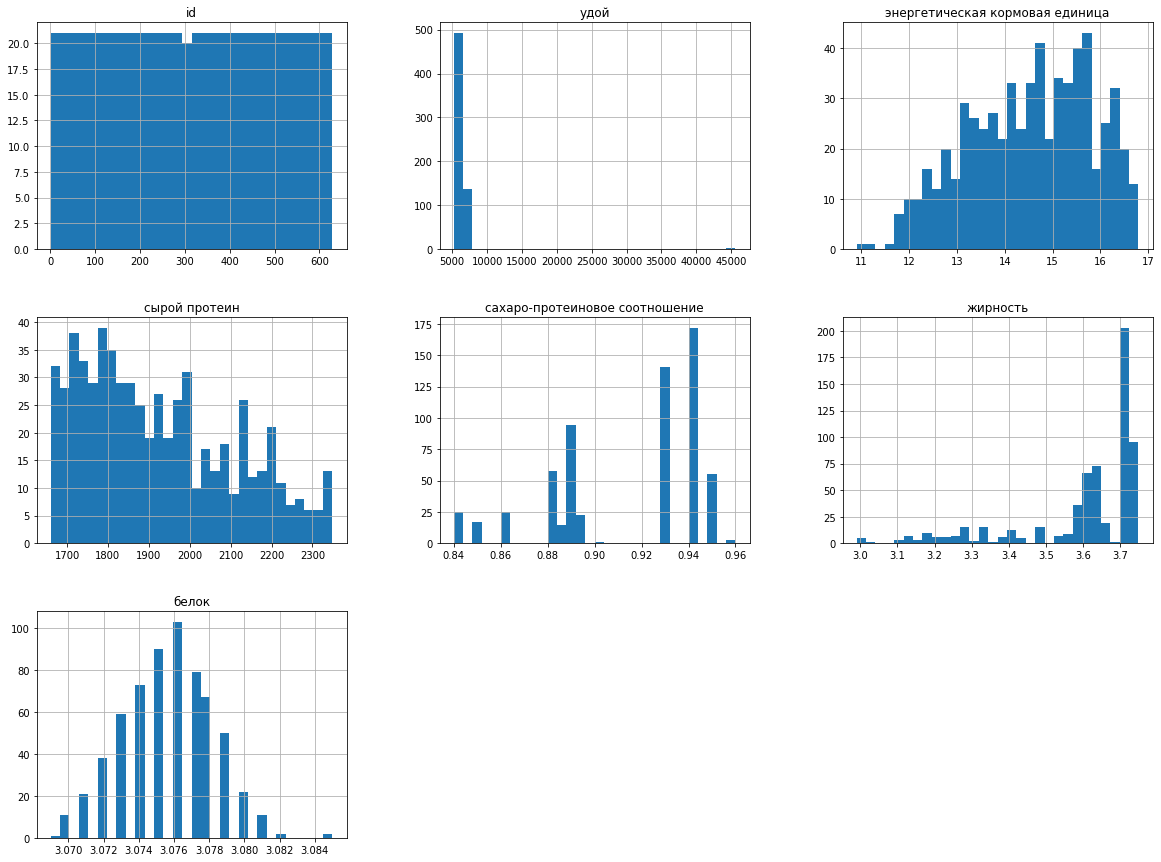

In [7]:
ferma_main.hist(bins = 30, figsize = (20,15))
display(ferma_main.describe())
plt.show()

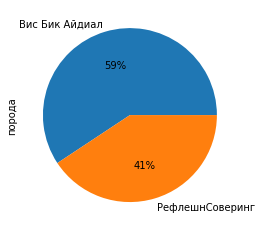

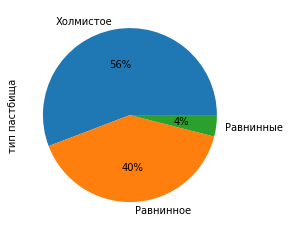

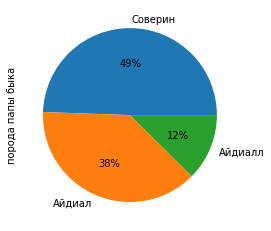

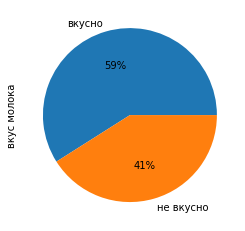

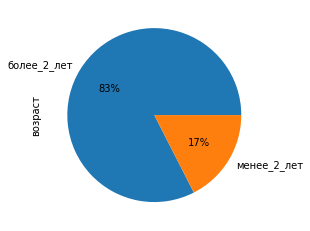

In [8]:
q = ferma_main.columns
w = ['порода', 'порода папы быка', 'тип пастбища', 'порода', 'папы', 'быка', 'вкус молока', 'возраст']
for i in q:
    if i in w:
        ferma_main[i].value_counts().plot(kind = 'pie', autopct='%1.0f%%')
        plt.show()
        print()

Из всех столбцов выделяется только "удой", видимо, в нем есть какие-то выбросы, поэтому посмотрим на него отдельно. В столбцах "тип пастбища", "порода папы быка" есть неявные дубликаты: Равнинное - Равнинные и Айдиал - Айдиалл. Исправим все это.

<AxesSubplot:>

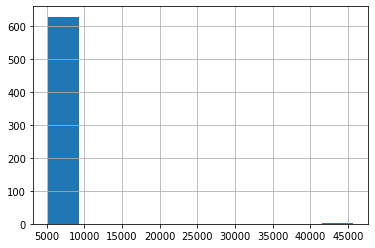

In [9]:
ferma_main['удой'].hist()

Есть выброс. Это значение около 44000, т.к.коровка не может давать так много молока в год. Отсортируем значения до 10000 и запомним id этого теленка, чтобы удалить его не только в ferma_main, но и в ferma_dad

In [10]:
display(ferma_main.query('удой > 10000'))

,id,удой,энергетическая кормовая единица,сырой протеин,сахаро-протеиновое соотношение,порода,тип пастбища,порода папы быка,жирность,белок,вкус молока,возраст
16,17,45616,11.5,1675,0.93,Вис Бик Айдиал,Холмистое,Айдиалл,3.22,3.076,вкусно,более_2_лет


,id,удой,энергетическая кормовая единица,сырой протеин,сахаро-протеиновое соотношение,жирность,белок
count,628.000000,628.000000,628.000000,628.000000,628.000000,628.000000,628.000000
mean,315.474522,6125.968153,14.548726,1923.759554,0.913089,3.604268,3.075670
std,181.475367,475.857053,1.301777,182.832816,0.032221,0.168093,0.002551
min,1.000000,5204.000000,10.900000,1660.000000,0.840000,2.990000,3.069000
25%,158.750000,5749.750000,13.500000,1771.750000,0.890000,3.590000,3.074000
50%,315.500000,6132.500000,14.700000,1888.000000,0.930000,3.650000,3.076000
75%,472.250000,6501.000000,15.600000,2062.250000,0.940000,3.720000,3.077000
max,629.000000,7222.000000,16.800000,2349.000000,0.960000,3.750000,3.085000


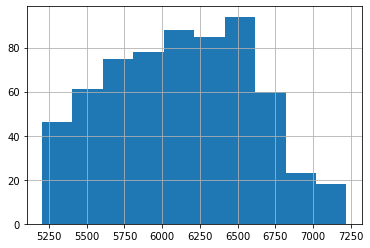

In [11]:
ferma_main = ferma_main.query('удой < 10000').reset_index(drop = True)
ferma_main['удой'].hist()
ferma_main.describe()

628


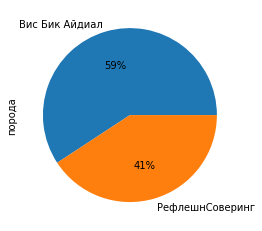

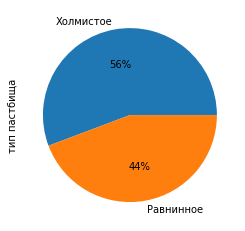

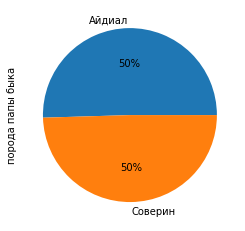

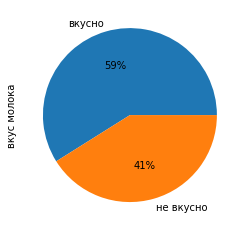

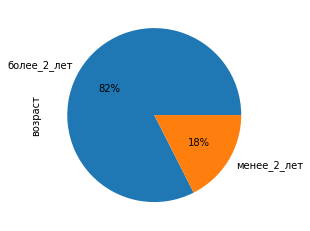

In [12]:
print(ferma_main.shape[0])
ferma_main['тип пастбища'] = ferma_main['тип пастбища'].str.replace('Равнинные', 'Равнинное')
ferma_main['порода папы быка'] = ferma_main['порода папы быка'].str.replace('Айдиалл', 'Айдиал')
q = ferma_main.columns
w = ['порода', 'порода папы быка', 'тип пастбища', 'порода', 'папы', 'быка', 'вкус молока', 'возраст']
for i in q:
    if i in w:
        ferma_main[i].value_counts().plot(kind = 'pie', autopct='%1.0f%%')
        plt.show()
        print()

С первой таблицей на этом все. Посмотрим на вторую

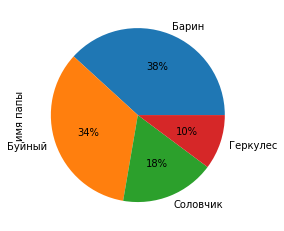

628


In [13]:
ferma_dad = ferma_dad.query('id != 17').reset_index(drop = True)
ferma_dad['имя папы'].value_counts().plot(kind = 'pie', autopct='%1.0f%%')
plt.show()
print(ferma_dad.shape[0])

Во второй таблице нет ничего особенного

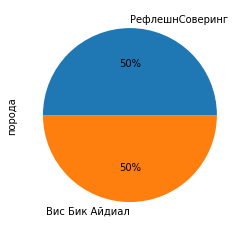

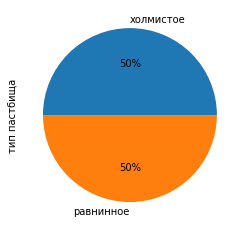

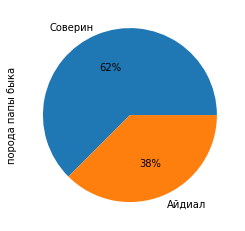

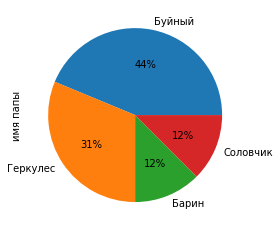

In [14]:
q = cow_buy.columns
w = ['порода', 'тип пастбища', 'порода папы быка', 'имя папы']
for i in q:
    if i in w:
        cow_buy[i].value_counts().plot(kind = 'pie', autopct='%1.0f%%')
        plt.show()
        print()

       текущая жирность  текущий уровень белка
count         16.000000              16.000000
mean           3.571875               3.068250
std            0.141620               0.011264
min            3.340000               3.046000
25%            3.415000               3.059500
50%            3.585000               3.073500
75%            3.692500               3.076750
max            3.770000               3.081000


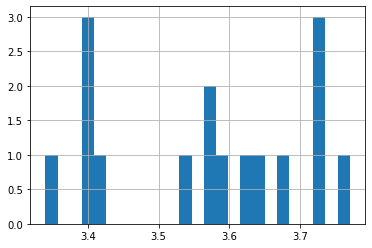

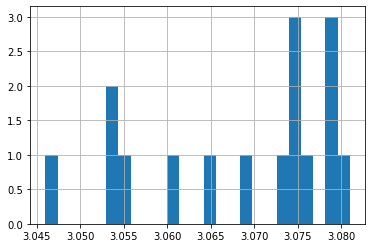

In [15]:
print(cow_buy.describe())
cow_buy['текущая жирность'].hist(bins = 25)
plt.show()
cow_buy['текущий уровень белка'].hist(bins = 25)
plt.show()

В третьей таблице выделяющихся данных не видно

На данном этапе мы провели исследовательский анализ данных всех датафреймов. В первом - из всех столбцов выделился "удой", в нем был один выброс, который мы удалили в двух таблицах: ferma_dad и ferma_main. В столбцах "тип пастбища", "порода папы быка" нашлись неявные дубликаты, которые мы исправили. Во второй и третьей таблице ничего не меняли. Немного странным показалось, что экоферма предоставла всего 16 коров. И у фермера названия быков совпадают с экофермой

## Корреляционный анализ

### Проверка взаимосвязи между целевым и входными признаками. Графики корреляции

Изучим взаимосвязь между целевым и входными признаками. Для этого будем использовать коэффициенты корреляции Спирмена,Кендалла, Пирсона. У нас в первом датафрейме есть количественные и категориальные переменные. Наши методы подойдут только для рассчета количественных, поэтому с ними сейчас и будем работать. Коэффициент корреляции Пирсона будем считать, если целевой и входной признак будут нормально распредлелены, иначе считаем по Спирмену. В нашем случае нормальными распределениями можно назвать целевой признак 'удой' и 'энергетическая кормовая единица', 'белок'.

Из-за того что у нас есть два целевых признака( 'вкус молока', 'удой'), один из которых('вкус молока') категориальный, то будем рассчитывать корреляцию в этом подшаге только у признака 'удой'. Посмтроим матрицу корреляции по методу Спирмена для 'удой', 'сырой протеин', 'сахаро-протеиновое соотношение', 'жирность', 'энергетическая кормовая единица', 'белок', т.к. во всех случаях, кроме эке и белок один или оба признака распределеныненормально. Для эке и белок расчитаем корреляцию по методу Пирсона отдельно.

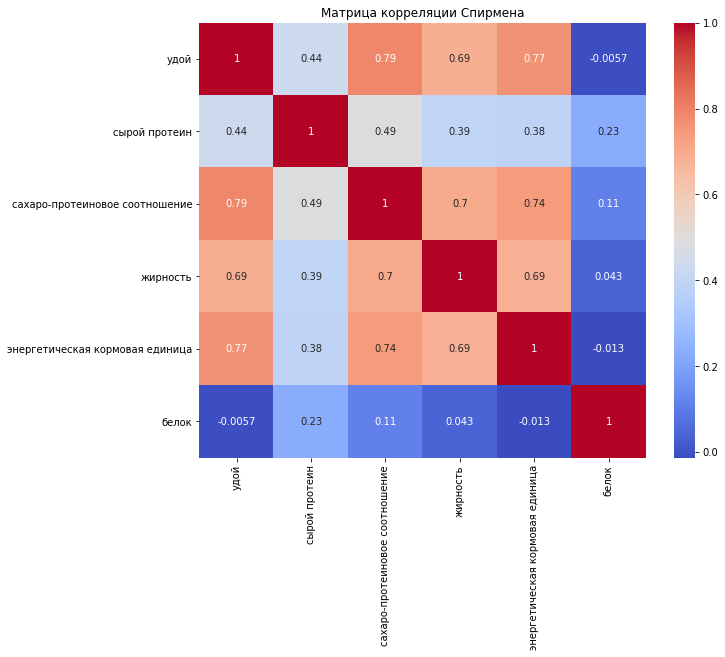

In [16]:

columns_ne_norm = ['удой', 'сырой протеин', 'сахаро-протеиновое соотношение', 'жирность', 'энергетическая кормовая единица', 'белок']
# Вычисляем матрицу корреляции
correlation_matrix = ferma_main[columns_ne_norm].corr(method='spearman')
# Визуализируем матрицу корреляции
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Матрица корреляции Спирмена')
plt.show()

In [17]:
corr = ferma_main['энергетическая кормовая единица'].corr(ferma_main['белок'])
print('Коэффициент корреляции Пирсона:', corr)

Коэффициент корреляции Пирсона: -0.008939046009824595


Если смотреть на целевой признак по шкале Чеддока, то высокая корреляция получается у удоя с энергетической кормовой единицей, сахаро-протейинового соотношения. Заметная у жирности. Умеренная у сырового протеина. А у белка ее нет.\
У входных признаков нет сильной корреляции, которая могла бы вызвать мультиколлинеарность

Визуализируем корреляции числовых признаков с помощью диаграмм рассеяния. Тоже только по количественным признакам

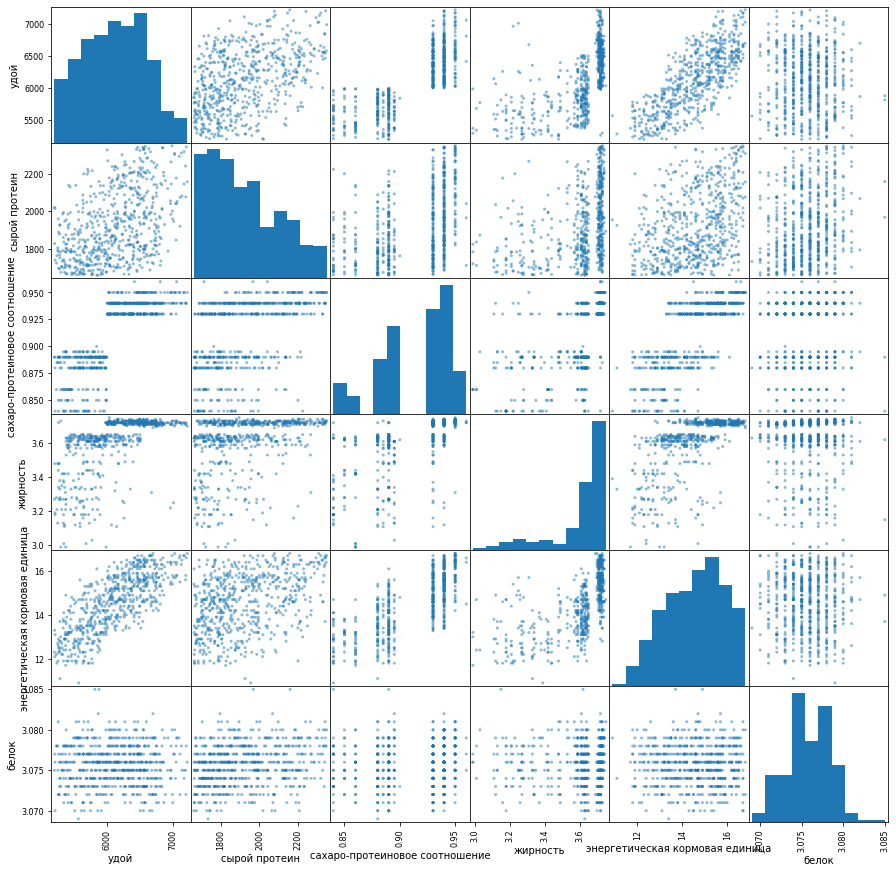

In [18]:
pd.plotting.scatter_matrix(ferma_main[['удой', 'сырой протеин', 'сахаро-протеиновое соотношение', 'жирность', 'энергетическая кормовая единица', 'белок']], figsize = (15, 15))
plt.show()

матрица корреляций визуализирует нашу матрицу корреляции Спирмена. По ней заметно, что у сахаро-протеинового соотношения данные делятся на три группы.

### Итоги шага

В данном анализе получилось расчитать и посмотреть на корреляцию только одного целевого признака - "удой". высокая корреляция получается у удоя с энергетической кормовой единицей, сахаро-протейинового соотношения. Чуть слабее у жирности. Умеренная у сырового протеина. А у белка ее нет.\
Некоторые значения p-value при расчете коэф кор по методу Спирмена получились > 0.05. Это означает, что между переменными  не существует статистически значимой корреляции, следовательно, нет линейной зависимости(т.к. нет никакой зависимости вообще). Например: удой и белок. Коэффициент корреляции Спирмена = -0.005700881383962722. p-value = 0.886621725204249. На графике видно, что белок от удоя не зависит, следовательно, нет даже зависимости\
У удоя с сахаро-протеиновым соотношением, жирностью и эке можно заметить, что корреляция идет по небольшой дуге. Запомним это и проверим во время обучения модели\
Мультиколлинеарность между входными признаками не наблюдается, т.к. значений p-value > 0.9 нет.

## Обучение модели линейной регрессии

### Построим модель линейной регрессии на данных первого датасета

#### Первая модель

Чтобы обучить модель, нужно разделить признаки на входные и целевые, а потом на тренировочные и тестовые. Заодно удалим признаки, которые никак не влияют на удой.

In [19]:
X = ferma_main.drop(['id', 'удой', 'жирность','белок','вкус молока'], axis = 1)
y = ferma_main['удой']
RANDOM_STATE = 42
X_train, X_test, y_train, y_test_1 = train_test_split(X, y, random_state = RANDOM_STATE)
print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test_1))

471
157
471
157


Выведем полученные длины выборок, чтобы потом можно было их проверить

Начнем с категориальных признаков. Нам нужно перевести их на язык, который понимает наша модель - числовой. У нас бинарные данные, поэтому лучше сразу избавиться от дамми ловушек

In [20]:
encoder = OneHotEncoder(drop='first', sparse = False)
cat_col_names = ['порода', 'тип пастбища', 'порода папы быка', 'возраст'] # Выделяем категориальные данные

X_train_ohe = encoder.fit_transform(X_train[cat_col_names]) # Обучаем энкодер на тренировочных входных данных 
X_test_ohe = encoder.transform(X_test[cat_col_names]) # А тут на тестовых

encoder_col_names = encoder.get_feature_names()

X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

print(X_train_ohe.shape[0])
print(X_test_ohe.shape[0])
X_train_ohe.head()

471
157


,x0_РефлешнСоверинг,x1_Холмистое,x2_Соверин,x3_менее_2_лет
0,1.0,1.0,1.0,0.0
1,1.0,1.0,1.0,1.0
2,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0


Теперь займемся масштабированием числовых данных

In [21]:
scaler = StandardScaler()
num_col_names = ['энергетическая кормовая единица', 'сырой протеин', 'сахаро-протеиновое соотношение']
X_train_scaled = scaler.fit_transform(X_train[num_col_names])
X_test_scaled = scaler.transform(X_test[num_col_names])

X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)

print(X_train_ohe.shape[0])
print(X_test_ohe.shape[0])
X_train_scaled.head()

471
157


,энергетическая кормовая единица,сырой протеин,сахаро-протеиновое соотношение
0,1.502378,1.079523,0.837130
1,-1.557270,-0.196920,-0.703660
2,0.125537,-1.386085,-1.011818
3,-0.103937,0.752230,0.837130
4,-1.098323,0.828598,-0.703660


Размерности совпадают, поэтому объединим данные, которые мы подогнали под обучение для модели

In [22]:
X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1).reset_index(drop=True)
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1).reset_index(drop=True)
display(X_train.head())
display(X_test.head())

,x0_РефлешнСоверинг,x1_Холмистое,x2_Соверин,x3_менее_2_лет,энергетическая кормовая единица,сырой протеин,сахаро-протеиновое соотношение
0,1.0,1.0,1.0,0.0,1.502378,1.079523,0.837130
1,1.0,1.0,1.0,1.0,-1.557270,-0.196920,-0.703660
2,0.0,0.0,0.0,0.0,0.125537,-1.386085,-1.011818
3,0.0,1.0,0.0,0.0,-0.103937,0.752230,0.837130
4,0.0,0.0,0.0,0.0,-1.098323,0.828598,-0.703660


,x0_РефлешнСоверинг,x1_Холмистое,x2_Соверин,x3_менее_2_лет,энергетическая кормовая единица,сырой протеин,сахаро-протеиновое соотношение
0,0.0,1.0,0.0,0.0,-0.486393,-0.813322,-1.011818
1,1.0,1.0,1.0,0.0,1.425887,0.026730,0.837130
2,1.0,1.0,1.0,1.0,-0.486393,-0.682405,-1.628134
3,0.0,0.0,1.0,0.0,-0.945340,-1.058792,-1.011818
4,0.0,1.0,1.0,0.0,0.584484,-1.413360,-0.703660


Тепрь можно обучить и проверить, как работает наша модель. Посмотрим это на метриках MAE и RMSE

In [23]:
model_lr_1 = LinearRegression()
model_lr_1.fit(X_train, y_train) # обучаем модель на тренировочных данных

predictions_1 = model_lr_1.predict(X_test) # делаем прогноз по тестовым данным входных признаков
mae = mean_absolute_error(y_test_1, predictions_1)
print(f'MAE = {int(mae)}')

MAE = 164


In [24]:
mse = mean_squared_error(y_test_1, predictions_1)
rmse = np.sqrt(mse)
print(f'RMSE = {int(rmse)}')

RMSE = 209


In [25]:
int(predictions_1.mean()) # посмотрим на среднее предсказание модели

6167

In [26]:
int(y_test_1.mean()) # посмторим на среднее значение целевого тестового признака

6141

In [27]:
164 / 6141 * 100 # Посмотрим на сколько процентов в среднем наша модель ошибалась

2.670574824947077

По данным результатам можно сказать, что сильных выбросов нет, т.к. разница между метриками небольшая по отношению к средним значениям, которые получались в предсказаниях

Проверим в скольких процентах случаев предсказание модели точнее среднего значения целевого признака с помощью R^2. И посмотрим это на графиках

In [28]:
r2_lr = r2_score(y_test_1, predictions_1)

print("R2 =", r2_lr)

R2 = 0.7844078173416967


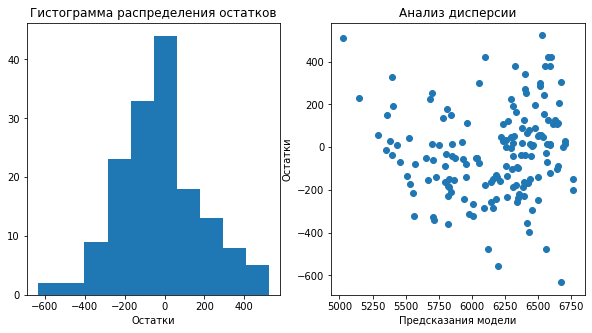

In [29]:
# Остатки
residuals = y_test_1 - predictions_1

# построим графики по количественным признакам — гистограмму частотности
# распределения и диаграмму рассеяния
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
axes[0].hist(residuals)
axes[0].set_title('Гистограмма распределения остатков')
axes[0].set_xlabel('Остатки')

axes[1].scatter(predictions_1, residuals)
axes[1].set_xlabel('Предсказания модели')
axes[1].set_ylabel('Остатки')
axes[1].set_title('Анализ дисперсии')
plt.show()

Распределение у гистограммы похоже на нормальное. Пик гистограммы находится в нуле, что уже хорошо. Выделяется только то, что график немного не симметричен относительно нуля. По второму графику видно, что у модели есть недочеты. Небольшое чередование низкой и высокой дисперсии остатков. Видно, что модель чаще предсказывала значения удоя чуть больше, чем оказывалось

У нас получилась достаточно хорошая модель, но явно не идеальная. Это заметно по полученным метрикам и графикам.\
Значение R2 в 0.78 означает, что ваша модель объясняет около 78% вариации зависимой переменной при использовании предоставленных данных. Это достаточно хорший результат, но его можно попробовать немного улучшить с помощью дополнительных исследований, как: добавить еще один входной признак "имя папы" из второй таблицы, изменить признак "сахаро-протеиновое соотношение" на категориальный и исключить нелинейность у "энергетическая кормовая единица". Этим мы и займемся чуть ниже.

#### Вторая модель

Посмторим на график распределения удоя от сахаро-протеинового соотношения

<AxesSubplot:xlabel='сахаро-протеиновое соотношение', ylabel='удой'>

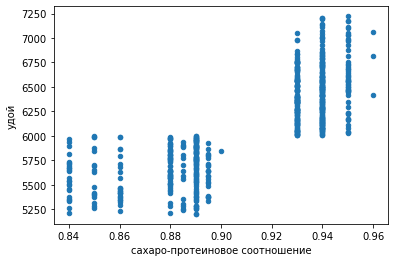

In [30]:
ferma_main.plot(x='сахаро-протеиновое соотношение', y='удой', kind='scatter')

Данные делятся на две группы, где 'сахаро-протеиновое соотношение' < 0.91 и наоборот. Чтобы улучшить нашу модель нужно переделать входной признак в категориальный

In [31]:
# Здесь мы делаем фильтрацию по значению, и если ментше порога присваиваем значение 0, иначе 1
mean_spo = ferma_main['сахаро-протеиновое соотношение'].mean()
ferma_main['сахаро-протеиновое соотношение'] = np.where(ferma_main['сахаро-протеиновое соотношение'] < 0.91, 0, 1)
ferma_main.head()

,id,удой,энергетическая кормовая единица,сырой протеин,сахаро-протеиновое соотношение,порода,тип пастбища,порода папы быка,жирность,белок,вкус молока,возраст
0,1,5863,14.2,1743,0,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет
1,2,5529,12.8,2138,0,Вис Бик Айдиал,Равнинное,Соверин,3.54,3.079,вкусно,менее_2_лет
2,3,5810,14.0,1854,0,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет
3,4,5895,12.4,2012,0,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет
4,5,5302,12.8,1675,0,Вис Бик Айдиал,Равнинное,Соверин,3.73,3.073,вкусно,менее_2_лет


Сделали. Теперь посмотрим на зависимость энергетической кормовой единицы от удоя

<AxesSubplot:xlabel='удой', ylabel='энергетическая кормовая единица'>

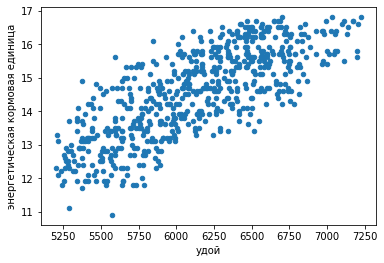

In [32]:
ferma_main.plot(x='удой', y='энергетическая кормовая единица', kind='scatter')

На данном графике можно заметить, что связь у удоя и эке не совсем линейная, а идет немного по дуге. Похоже на зависимость корня y = x**1/2. Нам нужно получить линейную зависимость. Для этого нужно возвести эке во 2 степень

In [33]:
# Возводим значение в квадрат и создаем новый столбец
mean_ece = ferma_main['энергетическая кормовая единица'].mean() # сохраним среднее значение 'энергетическая кормовая единица', тк она нам потом понадобится (в логистической регрессии)
ferma_main['энергетическая кормовая единица в кв'] = ferma_main['энергетическая кормовая единица'] ** 2
ferma_main.head()

,id,удой,энергетическая кормовая единица,сырой протеин,сахаро-протеиновое соотношение,порода,тип пастбища,порода папы быка,жирность,белок,вкус молока,возраст,энергетическая кормовая единица в кв
0,1,5863,14.2,1743,0,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет,201.64
1,2,5529,12.8,2138,0,Вис Бик Айдиал,Равнинное,Соверин,3.54,3.079,вкусно,менее_2_лет,163.84
2,3,5810,14.0,1854,0,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет,196.00
3,4,5895,12.4,2012,0,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет,153.76
4,5,5302,12.8,1675,0,Вис Бик Айдиал,Равнинное,Соверин,3.73,3.073,вкусно,менее_2_лет,163.84


Обучим еще раз модель, как делали это раньше и посмторим, что получится

In [34]:
X = ferma_main.drop(['id', 'удой', 'жирность','белок','вкус молока'], axis = 1)
y = ferma_main['удой']
RANDOM_STATE = 42
X_train, X_test, y_train, y_test_2 = train_test_split(X, y, random_state = RANDOM_STATE)
print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test_2))

471
157
471
157


In [35]:
encoder = OneHotEncoder(drop='first', sparse = False)
cat_col_names = ['порода', 'тип пастбища', 'порода папы быка', 'возраст']

X_train_ohe = encoder.fit_transform(X_train[cat_col_names])
X_test_ohe = encoder.transform(X_test[cat_col_names])

encoder_col_names = encoder.get_feature_names()

X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

print(X_train_ohe.shape[0])
print(X_test_ohe.shape[0])
X_train_ohe.head()

471
157


,x0_РефлешнСоверинг,x1_Холмистое,x2_Соверин,x3_менее_2_лет
0,1.0,1.0,1.0,0.0
1,1.0,1.0,1.0,1.0
2,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0


In [36]:
scaler = StandardScaler()
num_col_names = ['энергетическая кормовая единица в кв', 'сырой протеин', 'сахаро-протеиновое соотношение']
X_train_scaled = scaler.fit_transform(X_train[num_col_names])
X_test_scaled = scaler.transform(X_test[num_col_names])

X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)

print(X_train_ohe.shape[0])
print(X_test_ohe.shape[0])
X_train_scaled.head()

471
157


,энергетическая кормовая единица в кв,сырой протеин,сахаро-протеиновое соотношение
0,1.577968,1.079523,0.844232
1,-1.511438,-0.196920,-1.184509
2,0.082269,-1.386085,-1.184509
3,-0.150235,0.752230,0.844232
4,-1.102358,0.828598,-1.184509


In [37]:
X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1).reset_index(drop=True)
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1).reset_index(drop=True)
display(X_train.head())
display(X_test.head())

,x0_РефлешнСоверинг,x1_Холмистое,x2_Соверин,x3_менее_2_лет,энергетическая кормовая единица в кв,сырой протеин,сахаро-протеиновое соотношение
0,1.0,1.0,1.0,0.0,1.577968,1.079523,0.844232
1,1.0,1.0,1.0,1.0,-1.511438,-0.196920,-1.184509
2,0.0,0.0,0.0,0.0,0.082269,-1.386085,-1.184509
3,0.0,1.0,0.0,0.0,-0.150235,0.752230,0.844232
4,0.0,0.0,0.0,0.0,-1.102358,0.828598,-1.184509


,x0_РефлешнСоверинг,x1_Холмистое,x2_Соверин,x3_менее_2_лет,энергетическая кормовая единица в кв,сырой протеин,сахаро-протеиновое соотношение
0,0.0,1.0,0.0,0.0,-0.527089,-0.813322,-1.184509
1,1.0,1.0,1.0,0.0,1.490346,0.026730,0.844232
2,1.0,1.0,1.0,1.0,-0.527089,-0.682405,-1.184509
3,0.0,0.0,1.0,0.0,-0.961737,-1.058792,-1.184509
4,0.0,1.0,1.0,0.0,0.561660,-1.413360,-1.184509


In [38]:
model_lr_2 = LinearRegression()
model_lr_2.fit(X_train, y_train)

predictions_2 = model_lr_2.predict(X_test)
mae = mean_absolute_error(y_test_2, predictions_2)
print(f'MAE = {int(mae)}')

MAE = 149


In [39]:
mse = mean_squared_error(y_test_2, predictions_2)
rmse = np.sqrt(mse)
print(f'RMSE = {int(rmse)}')

RMSE = 192


In [40]:
# рассчитайте значения R2 для линейной регрессии
r2_lr = r2_score(y_test_2, predictions_2)

# выведите полученное значение R2
print("R2 =", r2_lr) 

R2 = 0.81808799268675


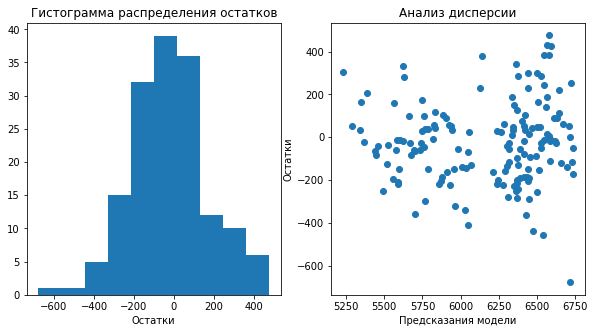

In [41]:
# Остатки
residuals = y_test_2 - predictions_2

# постройте графики по количественным признакам — гистограмму частотности
# распределения и диаграмму рассеяния
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
axes[0].hist(residuals)
axes[0].set_title('Гистограмма распределения остатков')
axes[0].set_xlabel('Остатки')

axes[1].scatter(predictions_2, residuals)
axes[1].set_xlabel('Предсказания модели')
axes[1].set_ylabel('Остатки')
axes[1].set_title('Анализ дисперсии')
plt.show()

По сравнению с первой моделью новая стала немного лучше. Это отразилось на всех метриках и графиках. R2 приблизилось на 3% к 1, а гистограмма распределения остатков стала более симметричной. Анализ дисперсии улучшился

#### Третья модель

Остался еще один параметр, который поможет сделать нашу модель еще лучше. Это добавление нового входного признака: имя папы. Он должен помочь улучшить модель, т.к. удой должен зависеть от отца ведь это гены. Нам нужно объединить первую таблицу со второй

In [42]:
ferma_main = ferma_main.merge(ferma_dad, on = 'id', how = 'left')
ferma_main.head()

,id,удой,энергетическая кормовая единица,сырой протеин,сахаро-протеиновое соотношение,порода,тип пастбища,порода папы быка,жирность,белок,вкус молока,возраст,энергетическая кормовая единица в кв,имя папы
0,1,5863,14.2,1743,0,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет,201.64,Буйный
1,2,5529,12.8,2138,0,Вис Бик Айдиал,Равнинное,Соверин,3.54,3.079,вкусно,менее_2_лет,163.84,Соловчик
2,3,5810,14.0,1854,0,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет,196.00,Барин
3,4,5895,12.4,2012,0,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет,153.76,Буйный
4,5,5302,12.8,1675,0,Вис Бик Айдиал,Равнинное,Соверин,3.73,3.073,вкусно,менее_2_лет,163.84,Барин


Теперь снова обучим нашу модель

In [43]:
X = ferma_main.drop(['id', 'удой', 'жирность','белок','вкус молока'], axis = 1)
y = ferma_main['удой']
RANDOM_STATE = 42
X_train, X_test, y_train, y_test_3 = train_test_split(X, y, random_state = RANDOM_STATE)
print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test_3))

471
157
471
157


In [44]:
encoder = OneHotEncoder(drop='first', sparse = False)
cat_col_names = ['порода', 'тип пастбища', 'порода папы быка', 'возраст', 'сахаро-протеиновое соотношение', 'имя папы']

X_train_ohe = encoder.fit_transform(X_train[cat_col_names])
X_test_ohe = encoder.transform(X_test[cat_col_names])

encoder_col_names = encoder.get_feature_names()

X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

print(X_train_ohe.shape[0])
print(X_test_ohe.shape[0])
X_train_ohe.head()

471
157


,x0_РефлешнСоверинг,x1_Холмистое,x2_Соверин,x3_менее_2_лет,x4_1,x5_Буйный,x5_Геркулес,x5_Соловчик
0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0
1,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [45]:
scaler = StandardScaler()
num_col_names = ['энергетическая кормовая единица в кв', 'сырой протеин']
X_train_scaled = scaler.fit_transform(X_train[num_col_names])
X_test_scaled = scaler.transform(X_test[num_col_names])

X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)

print(X_train_ohe.shape[0])
print(X_test_ohe.shape[0])
X_train_scaled.head()

471
157


,энергетическая кормовая единица в кв,сырой протеин
0,1.577968,1.079523
1,-1.511438,-0.196920
2,0.082269,-1.386085
3,-0.150235,0.752230
4,-1.102358,0.828598


In [46]:
X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1).reset_index(drop=True)
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1).reset_index(drop=True)
display(X_train.head())
display(X_test.head())

,x0_РефлешнСоверинг,x1_Холмистое,x2_Соверин,x3_менее_2_лет,x4_1,x5_Буйный,x5_Геркулес,x5_Соловчик,энергетическая кормовая единица в кв,сырой протеин
0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.577968,1.079523
1,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,-1.511438,-0.196920
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.082269,-1.386085
3,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,-0.150235,0.752230
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-1.102358,0.828598


,x0_РефлешнСоверинг,x1_Холмистое,x2_Соверин,x3_менее_2_лет,x4_1,x5_Буйный,x5_Геркулес,x5_Соловчик,энергетическая кормовая единица в кв,сырой протеин
0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.527089,-0.813322
1,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.490346,0.026730
2,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,-0.527089,-0.682405
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,-0.961737,-1.058792
4,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.561660,-1.413360


In [47]:
model_lr_3 = LinearRegression()
model_lr_3.fit(X_train, y_train)

predictions_3 = model_lr_3.predict(X_test)
mae = mean_absolute_error(y_test_3, predictions_3)
print(f'MAE = {int(mae)}')

MAE = 146


In [48]:
mse = mean_squared_error(y_test_3, predictions_3)
rmse = np.sqrt(mse)
print(f'RMSE = {int(rmse)}') 

RMSE = 188


In [49]:
# рассчитайте значения R2 для линейной регрессии
r2_lr = r2_score(y_test_3, predictions_3)

# выведите полученное значение R2
print("R2 =", r2_lr)

R2 = 0.8247542745210406


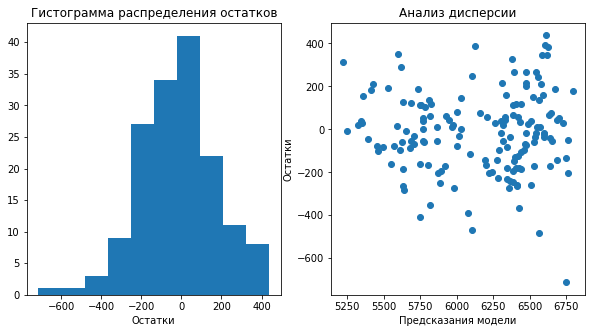

In [50]:
# Остатки
residuals = y_test_3 - predictions_3

# постройте графики по количественным признакам — гистограмму частотности
# распределения и диаграмму рассеяния
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
axes[0].hist(residuals)
axes[0].set_title('Гистограмма распределения остатков')
axes[0].set_xlabel('Остатки')

axes[1].scatter(predictions_3, residuals)
axes[1].set_xlabel('Предсказания модели')
axes[1].set_ylabel('Остатки')
axes[1].set_title('Анализ дисперсии')
plt.show()

С добавлением нового входного признака модель стала чуть-чуть лучше, но это лучше, чем ничего

На данном шаге мы обучили модель линейной регрессии. Первый раз у нас получились такие результаты: \
MAE = 164\
RMSE = 209\
R2 = 0.7844078173416967\
Два графика\
Результаты оказались приемлимы. Значения метрик получились хорошими. По графикам было заметно, что Гистограмма распределения остатков получилась не совсем симметричной, как и график Анализа дисперсии. Но были варианты, которые могли улучшить результаты.  Такой как: построение модели линейной регрессии с учётом преобразования признаков, нелинейно связанных с целевым признаком.\
И вот, что получилось:\
MAE = 149\
RMSE = 192\
R2 = 0.81808799268675\
Два графика\
Все параметры улучшились. Метрики и графики поменялись в лучшую сторону. Это означает, что мы улучшили нашу модель, но это еще не все. У нас был еще один признак, который находился в другом столбце - имя папы. В теории он должен был помочь нам, т.к. буренке по наследствию от папы может передаться его гены удоя, так сказать. Вот результаты:\
MAE = 146\
RMSE = 188\
R2 = 0.8247542745210406\
Два графика\
Результаты получились еще лучше. Метрики и графики изменились в положительную сторону. Если сравнить нашу последнюю версию модели с первой, то мы получим такие результаты:\
Показатели MAE улучшились на 11%\
Показатели RMSE - тоже на 11%\
Показатели R2 приблизились к 1 на 4%, что неплохо\
Графики стали глаже и симметричней. По графику анализа дисперсии теперь нет чередования низкой и высокой дисперсии остатков.

### Сравнение моделей

С помощью функции рассчитаем точность каждой модели по трём метрикам: MSE, MAE, RMSE

In [51]:
def metrix(y_test, predictions):
    mae = mean_absolute_error(y_test, predictions)
    print(f'MAE = {int(mae)}')

    mse = mean_squared_error(y_test, predictions)
    print(f'MSE = {int(mse)}') 
    rmse = np.sqrt(mse)
    print(f'RMSE = {int(rmse)}')

In [52]:
print('Первая версия')
metrix(y_test_1, predictions_1)
print()
print('Вторая версия')
metrix(y_test_2, predictions_2)
print()
print('Третья версия')
metrix(y_test_3, predictions_3)

Первая версия
MAE = 164
MSE = 43887
RMSE = 209

Вторая версия
MAE = 149
MSE = 37030
RMSE = 192

Третья версия
MAE = 146
MSE = 35673
RMSE = 188


Получились такие значения метрик у всех версий нашей модели. Самая последняя оказалась лучшей, что мы и писали выше. Давайте лучше посчитаем доверительный интервал нашей лучшей модели

In [53]:
stats.norm.interval(confidence = 0.95, loc = np.mean(predictions_3), scale = stats.sem(predictions_3))

(6092.340075854289, 6221.375070058381)

Это означает, что предсказанное значение с вероятностью в 95 % попадет в этот интервал (6092.340075854288, 6221.3750700583805)

### Прогноз удоя

А теперь проверим нашу модель в действии. Для этого будем использовать таблицу cow_buy. Добавим столбцы со средними значениями домноженными на 1.05, как просил фермер: "По новой схеме фермер планирует увеличить средние значения ЭКЕ, Сырой протеин, СПО на 5%."

In [54]:
cow_buy_2 = cow_buy[['порода', 'тип пастбища', 'порода папы быка', 'имя папы']].copy()
cow_buy_2.loc[:, 'энергетическая кормовая единица в кв'] = (mean_ece * 1.05) ** 2 # делаю через loc, т.к. без него вылезает предупреждение
cow_buy_2.loc[:, 'сырой протеин'] = ferma_main['сырой протеин'].mean() * 1.05
cow_buy_2.loc[:, 'сахаро-протеиновое соотношение'] = np.where((mean_spo * 1.05) < 0.91, 0, 1)
cow_buy_2.loc[:, 'возраст'] = 'менее_2_лет'
cow_buy_2.loc[:, 'тип пастбища'] = cow_buy_2['тип пастбища'].replace('холмистое', 'Холмистое')
cow_buy_2.loc[:, 'тип пастбища'] = cow_buy_2['тип пастбища'].replace('равнинное', 'Равнинное')
cow_buy_2.head()

,порода,тип пастбища,порода папы быка,имя папы,энергетическая кормовая единица в кв,сырой протеин,сахаро-протеиновое соотношение,возраст
0,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,233.361138,2019.947532,1,менее_2_лет
1,Вис Бик Айдиал,Равнинное,Соверин,Буйный,233.361138,2019.947532,1,менее_2_лет
2,РефлешнСоверинг,Равнинное,Соверин,Барин,233.361138,2019.947532,1,менее_2_лет
3,РефлешнСоверинг,Холмистое,Айдиал,Буйный,233.361138,2019.947532,1,менее_2_лет
4,РефлешнСоверинг,Равнинное,Айдиал,Буйный,233.361138,2019.947532,1,менее_2_лет


In [55]:
cat_col_names = ['порода', 'тип пастбища', 'порода папы быка', 'возраст', 'сахаро-протеиновое соотношение', 'имя папы']
cow_buy_ohe = encoder.transform(cow_buy_2[cat_col_names])
cow_buy_ohe = pd.DataFrame(cow_buy_ohe, columns = encoder_col_names)
num_col_names = ['энергетическая кормовая единица в кв', 'сырой протеин']
cow_buy_scaled = scaler.transform(cow_buy_2[num_col_names])
cow_buy_scaled = pd.DataFrame(cow_buy_scaled, columns=num_col_names)
cow_buy_2 = pd.concat([cow_buy_ohe, cow_buy_scaled], axis=1).reset_index(drop=True)
predictions_2 = model_lr_3.predict(cow_buy_2)
predictions_2

array([6417.37058806, 6378.71102836, 6091.45106657, 6400.54066779,
       6349.59735757, 6425.38021759, 6378.71102836, 6400.54066779,
       6152.159151  , 6425.38021759, 6417.37058806, 6127.4747423 ,
       6400.54066779, 6152.159151  , 6425.38021759, 6378.71102836])

Все удои наша модель предсказала больше 6000. Это значит, что по удою все коровы подходят фермеру

## Обучение модели логистической регрессии

### Построение модели

Будем использовать датафрейм ferma_main из третьей модели линейной регрессии с измененными столбцами, которые дали нам лучшую оценку прогнозов.

Сразу поменяем столбец 'вкус молока' на 0 или 1, чтобы модель смогла обучиться

In [56]:
ferma_main['вкус молока'] = ferma_main['вкус молока'].replace('вкусно', 1)
ferma_main['вкус молока'] = ferma_main['вкус молока'].replace('не вкусно', 0)


ferma_main.head()

,id,удой,энергетическая кормовая единица,сырой протеин,сахаро-протеиновое соотношение,порода,тип пастбища,порода папы быка,жирность,белок,вкус молока,возраст,энергетическая кормовая единица в кв,имя папы
0,1,5863,14.2,1743,0,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,1,более_2_лет,201.64,Буйный
1,2,5529,12.8,2138,0,Вис Бик Айдиал,Равнинное,Соверин,3.54,3.079,1,менее_2_лет,163.84,Соловчик
2,3,5810,14.0,1854,0,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,0,более_2_лет,196.00,Барин
3,4,5895,12.4,2012,0,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.075,0,более_2_лет,153.76,Буйный
4,5,5302,12.8,1675,0,Вис Бик Айдиал,Равнинное,Соверин,3.73,3.073,1,менее_2_лет,163.84,Барин


Разделим данные на входные и целевые. Из ferma_main удалим всего два признака, которые не влияют на вкус молока это:'вкус молока', 'id'. Остальные данные должны повлиять на модель в лучшую сторону, т.к. от породы, порода папы быка, имя папы. Эти параметры, зависящие от ген, которые могли передаться буренкам.

In [57]:
X = ferma_main.drop(columns = ['вкус молока', 'id'], axis = 1)
y = ferma_main['вкус молока']

RANDOM_STATE = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = RANDOM_STATE)
print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))

471
157
471
157


Масштабируем категориальные данные, а потом - числовые

In [58]:
encoder = OneHotEncoder(drop='first', sparse = False)
cat_col_names = ['порода', 'тип пастбища', 'порода папы быка', 'возраст', 'имя папы']

X_train_ohe = encoder.fit_transform(X_train[cat_col_names])
X_test_ohe = encoder.transform(X_test[cat_col_names])
encoder_col_names = encoder.get_feature_names()

X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

print(X_train_ohe.shape[0])
print(X_test_ohe.shape[0])
X_train_ohe.head()

471
157


,x0_РефлешнСоверинг,x1_Холмистое,x2_Соверин,x3_менее_2_лет,x4_Буйный,x4_Геркулес,x4_Соловчик
0,1.0,1.0,1.0,0.0,0.0,0.0,1.0
1,1.0,1.0,1.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [59]:
scaler = StandardScaler()
num_col_names = ['энергетическая кормовая единица', 'сырой протеин', 'жирность', 'белок']
X_train_scaled = scaler.fit_transform(X_train[num_col_names])
X_test_scaled = scaler.transform(X_test[num_col_names])

X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)

print(X_train_ohe.shape[0])
print(X_test_ohe.shape[0])
X_train_scaled.head()

471
157


,энергетическая кормовая единица,сырой протеин,жирность,белок
0,1.502378,1.079523,0.562532,-0.679069
1,-1.557270,-0.196920,-1.601817,-1.452568
2,0.125537,-1.386085,-2.563750,1.254677
3,-0.103937,0.752230,0.081565,1.254677
4,-1.098323,0.828598,0.201807,0.094429


Соединим наши признаки в один датафрейм

In [60]:
X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1).reset_index(drop=True)
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1).reset_index(drop=True)
display(X_train.head())

,x0_РефлешнСоверинг,x1_Холмистое,x2_Соверин,x3_менее_2_лет,x4_Буйный,x4_Геркулес,x4_Соловчик,энергетическая кормовая единица,сырой протеин,жирность,белок
0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.502378,1.079523,0.562532,-0.679069
1,1.0,1.0,1.0,1.0,0.0,0.0,0.0,-1.557270,-0.196920,-1.601817,-1.452568
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.125537,-1.386085,-2.563750,1.254677
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,-0.103937,0.752230,0.081565,1.254677
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-1.098323,0.828598,0.201807,0.094429


А теперь обучим ее и посмотрим на метрики

In [61]:
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)

predictions = model_lr.predict(X_test)
acc = accuracy_score(y_test, predictions)
recall = recall_score(y_test, predictions)
precision = precision_score(y_test, predictions)
print(f'accuracy = {acc}')
print(f'recall = {recall}')
print(f'precision = {precision}')

accuracy = 0.5987261146496815
recall = 0.8636363636363636
precision = 0.5984251968503937


precision FP - молоко не вкусное, а модель сказала, что вкусное\
recall FN - молоко вкусное, а модель сказала, что не вкусное\
По данным метрикам можно сказать, что модель чаще предсказывает FP, чем FN

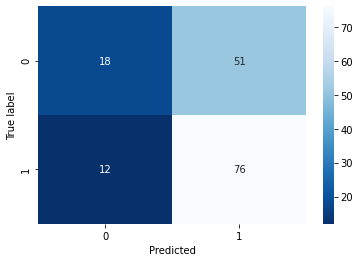

In [62]:
cm = confusion_matrix(y_test, predictions)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues_r')
plt.ylabel('True label')
plt.xlabel('Predicted');

Фермер очень тщательно отбирает буренок, поэтому ему нельзя, чтобы модель сказала, что у буренки вкусное молоко, а оказалось наоборот. За это отвечает FP, т.е. ложно-положительная ошибка. За такую ошибку отвечает метрика precision. Чем она ближе к 1, тем меньше данных предсказаний. У нас precision = 0.61, что не очень хорошо, т.к. нам нужно мминимизировать данные ошибки.

Посмторим на реальные значения из тестовой целевой выборки (y_valid), вероятность, которую дала модель (y_proba) и предсказанные значения (predictions)

In [63]:
y_proba = model_lr.predict_proba(X_test)[:,1]
data = pd.DataFrame(zip(y_test, y_proba, predictions), columns = ['y_valid', 'y_proba', 'predictions']).sort_values(by='y_proba',ascending=False) 
print(len(data))
data.head()

157


,y_valid,y_proba,predictions
85,1,0.849849,1
110,1,0.831565,1
66,1,0.825918,1
116,0,0.808268,1
17,1,0.796226,1


Найдем порог классификации, который даст нам самые оптимальные значения, т.е. при котором precision = 1

In [64]:
# уберем предупреждение, которое выводится при вызове кода с помощью первых 5 строк
import warnings
from sklearn.exceptions import UndefinedMetricWarning

warnings.filterwarnings("ignore", category=UndefinedMetricWarning)

for i in np.linspace(0, 1, 9):
    X = model_lr.predict_proba(X_test)[:,1] > i
    precission = precision_score(y_test, X)
    print(f'{i}: {precission}')

0.0: 0.5605095541401274
0.125: 0.5605095541401274
0.25: 0.5641025641025641
0.375: 0.5704697986577181
0.5: 0.5984251968503937
0.625: 0.7066666666666667
0.75: 0.782608695652174
0.875: 0.0
1.0: 0.0


Сократим интервал поиска, чтобы получить значения точнее

In [65]:
warnings.filterwarnings("ignore", category=UndefinedMetricWarning)

for i in np.linspace(0.6, 0.9, 20):
    X = model_lr.predict_proba(X_test)[:,1] > i
    precission = precision_score(y_test, X)
    print(f'{i}: {precission}')

0.6: 0.6966292134831461
0.6157894736842106: 0.7011494252873564
0.631578947368421: 0.7361111111111112
0.6473684210526316: 0.7272727272727273
0.6631578947368421: 0.7666666666666667
0.6789473684210526: 0.7692307692307693
0.6947368421052631: 0.8085106382978723
0.7105263157894737: 0.7906976744186046
0.7263157894736842: 0.7567567567567568
0.7421052631578947: 0.7692307692307693
0.7578947368421053: 0.8
0.7736842105263158: 0.9090909090909091
0.7894736842105263: 0.8888888888888888
0.8052631578947369: 0.75
0.8210526315789474: 1.0
0.8368421052631579: 1.0
0.8526315789473684: 0.0
0.868421052631579: 0.0
0.8842105263157896: 0.0
0.9: 0.0


Идеальный порог классификации, чтобы минимизировать precision это 0.815, но при таких значениях мы можем не получить ни одной коровы, которая подойдет фермеру, поэтому проверим еще нашу модель при значении порога равного 0.69. При нем precision = 0.8, что достаточно много

Посмторим, как изменились метрики

In [66]:
X = model_lr.predict_proba(X_test)[:,1] > 0.815
accuracy = accuracy_score(y_test, X)
recall = recall_score(y_test, X)
precision = precision_score(y_test, X)
print(f'accuracy = {accuracy}, recall = {recall}, precision = {precision}')

accuracy = 0.4585987261146497, recall = 0.03409090909090909, precision = 1.0


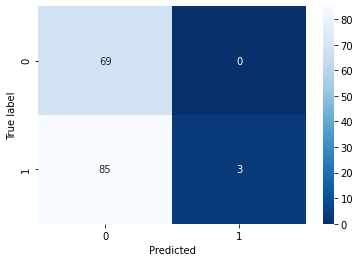

In [67]:
cm = confusion_matrix(y_test, X)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues_r')
plt.ylabel('True label')
plt.xlabel('Predicted')
plt.show()

Получилось слишком мало значений TP. Это означает, что у фермера из 157 коров всего 3 на 100% удовлетворяют его по вкусу молока. Слишком большой запрос от фермера. Из-за этого появляется большой шанс того, что ни одна буренка, предоставленная от ЭКОФЕРМА может не подойти

In [68]:
X = model_lr.predict_proba(X_test)[:,1] > 0.69
accuracy = accuracy_score(y_test, X)
recall = recall_score(y_test, X)
precision = precision_score(y_test, X)
print(f'accuracy = {accuracy}, recall = {recall}, precision = {precision}')

accuracy = 0.6242038216560509, recall = 0.4431818181818182, precision = 0.7959183673469388


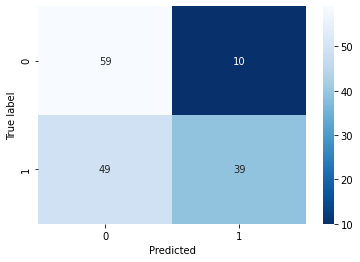

In [69]:
cm = confusion_matrix(y_test, X)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues_r')
plt.ylabel('True label')
plt.xlabel('Predicted')
plt.show()

При меньшем пороге классификации получились неплохие результаты. FP ошибок меньше всего, а TP хотя бы не равны 3, как в таблице выше

Применим модель логистической регрессии к датасету cow_buy.csv. Для этого нужно подготовить данные, по которым обучалась наша модель

In [70]:
cow_buy_3 = cow_buy
cow_buy_3.loc[:, 'энергетическая кормовая единица'] = mean_ece * 1.05
cow_buy_3.loc[:, 'сырой протеин'] = ferma_main['сырой протеин'].mean() * 1.05
cow_buy_3.loc[:, 'сахаро-протеиновое соотношение'] = np.where((mean_spo * 1.05) < 0.91, 0, 1)
cow_buy_3.loc[cow_buy_3['тип пастбища'] == 'холмистое', 'тип пастбища'] = 'Холмистое'
cow_buy_3.loc[cow_buy_3['тип пастбища'] == 'равнинное', 'тип пастбища'] = 'Равнинное'
cow_buy_3.loc[:, 'возраст'] = 'менее_2_лет'
cow_buy_3 = cow_buy_3.rename(columns = {'текущая жирность': 'жирность', 'текущий уровень белка': 'белок'})
cow_buy_3.head()

,порода,тип пастбища,порода папы быка,имя папы,жирность,белок,энергетическая кормовая единица,сырой протеин,сахаро-протеиновое соотношение,возраст
0,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,3.58,3.076,15.276162,2019.947532,1,менее_2_лет
1,Вис Бик Айдиал,Равнинное,Соверин,Буйный,3.54,3.081,15.276162,2019.947532,1,менее_2_лет
2,РефлешнСоверинг,Равнинное,Соверин,Барин,3.59,3.074,15.276162,2019.947532,1,менее_2_лет
3,РефлешнСоверинг,Холмистое,Айдиал,Буйный,3.40,3.061,15.276162,2019.947532,1,менее_2_лет
4,РефлешнСоверинг,Равнинное,Айдиал,Буйный,3.64,3.074,15.276162,2019.947532,1,менее_2_лет


Теперь масштабируем категориальные и числовые признаки

In [71]:
cat_col_names = ['порода', 'тип пастбища', 'порода папы быка', 'возраст', 'имя папы']
cow_buy_3_ohe = encoder.transform(cow_buy_3[cat_col_names])
cow_buy_3_ohe = pd.DataFrame(cow_buy_3_ohe, columns=encoder_col_names)

In [72]:
num_col_names = ['энергетическая кормовая единица', 'сырой протеин', 'жирность', 'белок']
cow_buy_3_scaled = scaler.transform(cow_buy_3[num_col_names])
cow_buy_3_scaled = pd.DataFrame(cow_buy_3_scaled, columns=num_col_names)


Соединим их в один датафрейм и сделаем прогноз

In [73]:
cow_buy_3 = pd.concat([cow_buy_3_ohe, cow_buy_3_scaled], axis=1).reset_index(drop=True)

In [74]:
predictions_cow_buy_3 = model_lr.predict(cow_buy_3)
display(predictions_cow_buy_3)
X = model_lr.predict_proba(cow_buy_3)[:,1] > 0.815
X

array([1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0])

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False])

Не нашлось ни одной буренки, которая смогла удовлетворить условиям фермера

In [75]:
predictions_cow_buy_3 = model_lr.predict(cow_buy_3)
display(predictions_cow_buy_3)
X_2_pred = model_lr.predict_proba(cow_buy_3)[:,1]
X_2 = model_lr.predict_proba(cow_buy_3)[:,1] > 0.69
X_2

array([1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0])

array([ True,  True, False, False, False, False, False,  True, False,
       False, False,  True, False,  True, False, False])

Для меньшего порога классификации нашлось целых 5 коров, которые удовлетворяют условиям фермера

## Итоговые выводы

In [76]:
predictions_2 = pd.DataFrame(predictions_2, columns = ['прогноз удоя'])
X = pd.DataFrame(X, columns = ['прогноз вкуса молока'])
itogi = pd.concat([predictions_2, X], axis = 1)
itogi['бинарный прогноз удоя'] = itogi['прогноз удоя']
itogi.loc[itogi['бинарный прогноз удоя'] > 6000, 'бинарный прогноз удоя'] = True
itogi['вероятность'] = X_2_pred
itogi = itogi.sort_values(by = 'вероятность', ascending = False)
itogi

,прогноз удоя,прогноз вкуса молока,бинарный прогноз удоя,вероятность
7,6400.540668,False,True,0.777484
11,6127.474742,False,True,0.739202
1,6378.711028,False,True,0.707519
0,6417.370588,False,True,0.700696
13,6152.159151,False,True,0.699326
6,6378.711028,False,True,0.661543
2,6091.451067,False,True,0.604105
4,6349.597358,False,True,0.538002
9,6425.380218,False,True,0.519992
12,6400.540668,False,True,0.467416


In [77]:
predictions_2 = pd.DataFrame(predictions_2, columns = ['прогноз удоя'])
X_2 = pd.DataFrame(X_2, columns = ['прогноз вкуса молока'])
itogi = pd.concat([predictions_2, X_2], axis = 1)
itogi['бинарный прогноз удоя'] = itogi['прогноз удоя']
itogi.loc[itogi['бинарный прогноз удоя'] > 6000, 'бинарный прогноз удоя'] = True
itogi['вероятность'] = X_2_pred
itogi.sort_values(by = 'вероятность', ascending = False)
itogi

,прогноз удоя,прогноз вкуса молока,бинарный прогноз удоя,вероятность
0,6417.370588,True,True,0.700696
1,6378.711028,True,True,0.707519
2,6091.451067,False,True,0.604105
3,6400.540668,False,True,0.371622
4,6349.597358,False,True,0.538002
5,6425.380218,False,True,0.136937
6,6378.711028,False,True,0.661543
7,6400.540668,True,True,0.777484
8,6152.159151,False,True,0.178822
9,6425.380218,False,True,0.519992


Коров, для которых спрогнозирован удой более 6000 килограммов в год и вкусное молоко для  precision = 1 нет. А для  precision = 0.8 нашлось 5 коров из 16. По таблице можно посмтореть и выбрать самых лучших коров

Фермер не может купить ни одну из коров на продаже с минимальным риском для себя. У него оказались слишком высокие требования для вкуса молока. Если он готов увеличить риск на ошибку нашей модели, то подойдут 5 коров\
Мы бы могли посоветовать ему пересмотреть свой взгляд на то, какой вкус молока должны давать буренки, т.к. даже по его ферме, на которой мы обучали и тестировали нашу модель оказалось слишком мало таких коров. Он может повысить требования по удою коров, т.к. все коровы от экофермы подошли под условия, а требования по вкусу молока снизить.\
Нельзя сказать, что наша модель получилась идеальной. Ее можно было улучшить. Например: мы не проверяли корреляцию категориальных признаков, что могло повлиять на итоговый результат. Это была первая машина, которую мы обучили. Могло просто не хватить знаний и опыта, чтобы получить результат точнее.\
При анализе рисков или экономических расчетов важно учитывать такие метрики моделей классификации, как: Recall и Precision.\
Полнота (Recall): Эта метрика измеряет способность модели правильно обнаруживать положительные случаи из всех истинных положительных случаев. В контексте анализа рисков или экономических расчетов, это может быть важно для минимизации ложноотрицательных прогнозов.\
Точность (Precision): Эта метрика измеряет способность модели предсказывать правильные положительные случаи из всех положительных прогнозов. В контексте анализа рисков или экономических расчетов, это может быть важно для минимизации ложноположительных прогнозов.

## Общий вывод

Данный проект оказался достаточно большим и трудоемким. Для того чтобы помочь фермеру с выбором буренок, котоые предоставила ему ЭкоФерма, нам нужно было обучить две модели. Для этого фермер предоставил нам данные о своих коровах и назвал условия, по которым нужно было определить удой и вкус молока коров.\
Для этого мы:\
Загрузили и изучили данные, которые нам предоставили. В этом шаге мы еще подправили названия столбцов, чтобы было легче работать с таблицами\
Предобработали их. Тут не оказалось пропусков, а были только дубликаты, которые мы успешно удалили\
Провели исследовательский и корреляционный анализ. На данном этапе мы провели исследовательский анализ данных всех датафреймов. В первом - из всех столбцов выделился "удой", в нем был один выброс, который мы удалили в двух таблицах: ferma_dad и ferma_main. В столбцах "тип пастбища", "порода папы быка" нашлись неявные дубликаты, которые мы исправили. Во второй и третьей таблице ничего не меняли. Немного странным показалось, что экоферма предоставла всего 16 коров. И у фермера названия быков совпадают с экофермой\
Обучили модель линейной регрессии. У нас получилось три версии нашей модели. Лучшей из них оказалась последняя. В ней мы учли преобразования признаков, нелинейно связанных с целевым признаком. Еще присоединили вторую таблицу, которую нам дал фермер.\
Обучили модель логистической регрессии. Этот шаг был похож на прошлый, но только в нем уже был категориальный целевой признак.  Мы построили модель логистической регрессии на данных датасета farm_main.csv, проанализировали ее, применили модель логистической регрессии к датасету cow_buy.csv. Модель была рассчитана под минимальное кол-во ошибок, где модель говорила, что молоко вкусное, а на самом деле оно таким не являлось.\
В итоге у нас получились не очень удовлетворительные результаты для фермера. Его спрос с коров, а точнее вкуса молока, оказался слишком завышенным. Из всех предоставленных буренок ЭкоФермой под желаемое кол-во удоя попали все, а под  вкус молока - никто. Из-за этого мы не можем посоветовать фермеру ни одну корову, но можем посоветовать снизить спрос со вкуса молока у коров.\
Еще можно немного увеличить шанс на ошибку модели, и при этом под условия фермера подойдут 5 коров из 16. По последней таблице можно посмтореть и выбрать самых лучших коров